## 1. Import Libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Reproducibility
seed = 1
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

## 2. Load Data 

In [2]:
# Load MNIST (using tf.keras.datasets)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


## 3. Data Preprocessing

In [3]:
# Normalize pixel values (0–255 -> 0–1)
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [4]:
# Split training and validation data
X_train, X_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.1, random_state=42
)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Test set:", x_test.shape)

Training set: (54000, 28, 28)
Validation set: (6000, 28, 28)
Test set: (10000, 28, 28)


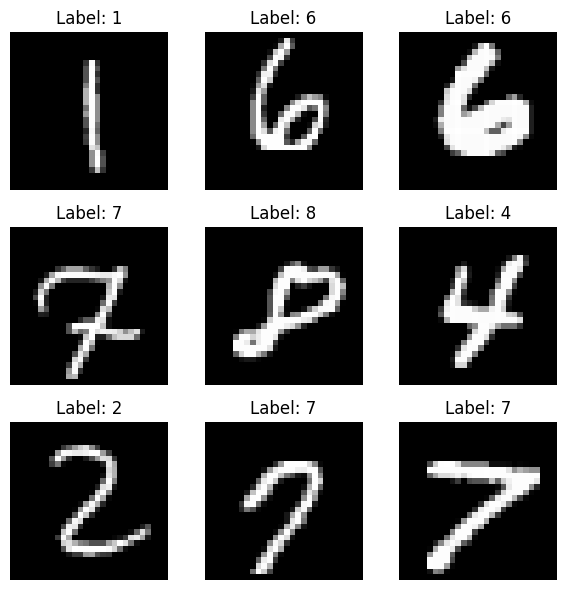

In [5]:
# Plot the first 9 images from the training set
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## 4. Model Definition and Compilation

In [6]:
# Add channel dimension (N, 28, 28) -> (N, 28, 28, 1) for TF (no. of channels at last)
X_train = np.expand_dims(X_train, axis=-1)
X_val   = np.expand_dims(X_val, axis=-1)
x_test  = np.expand_dims(x_test, axis=-1)

print("After adding channel dim - Training:", X_train.shape)  # should be (N,28,28,1)

# model in TensorFlow
def LeNet5():
    model = keras.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(32, kernel_size=3, padding='valid', activation='relu'), # (26,26,32)
        layers.MaxPool2D(pool_size=2),                                        # (13,13,32)
        layers.Conv2D(64, kernel_size=3, padding='valid', activation='relu'), # (11,11,64)
        layers.Conv2D(64, kernel_size=3, padding='valid', activation='relu'), # (9,9,64)
        layers.MaxPool2D(pool_size=2),                                        # (4,4,64)
        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(10)  # logits
    ])
    return model

model = LeNet5()
model.summary()

After adding channel dim - Training: (54000, 28, 28, 1)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       102,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,254 (622.09 KB)

 Trainable params: 159,254 (622.09 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Loss, optimizer and compile
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

## 5. Model Training

In [8]:
# Training parameters
batch_size = 128
n_epochs = 10

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True
)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8357 - loss: 0.5388 - val_accuracy: 0.9825 - val_loss: 0.0633
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9805 - loss: 0.0627 - val_accuracy: 0.9850 - val_loss: 0.0501
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9870 - loss: 0.0421 - val_accuracy: 0.9885 - val_loss: 0.0421
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9908 - loss: 0.0313 - val_accuracy: 0.9893 - val_loss: 0.0390
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9928 - loss: 0.0237 - val_accuracy: 0.9893 - val_loss: 0.0383
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9946 - loss: 0.0178 - val_accuracy: 0.9905 - val_loss: 0.0380
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9955 - loss: 0.0151 - val_accuracy: 0.9873 - val_loss: 0.0501
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9958 - loss: 0.0127 - val_accuracy: 0

## 6. Ploting accuracy and loss 

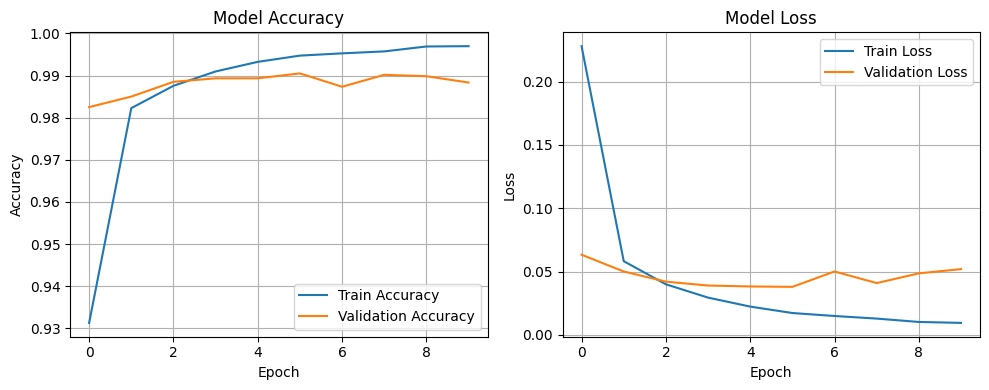

In [9]:
# Plot training history 
history_dict = history.history  # Keras stores logs here

plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 7. Evaluation

In [10]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc*100:.2f}%")

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9859 - loss: 0.0497
Test loss: 0.0370, Test accuracy: 98.99%
